#### Import Necessary Packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

### Loading the DataSet

In [3]:
df = pd.read_csv("../data/cleaned_weather.csv")

In [4]:
df.head(10)

,country,location_name,latitude,longitude,timezone,last_updated,temperature_celsius,condition_text,wind_kph,wind_degree,...,feels_like_celsius,visibility_km,uv_index,gust_kph,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10
0,Afghanistan,Kabul,34.52,69.18,Asia/Kabul,2024-05-16 13:15,26.6,Partly Cloudy,13.3,338,...,25.3,10.0,7.0,15.3,277.0,103.0,1.1,0.2,8.4,26.6
1,Albania,Tirana,41.33,19.82,Europe/Tirane,2024-05-16 10:45,19.0,Partly cloudy,11.2,320,...,19.0,10.0,5.0,18.4,193.6,97.3,0.9,0.1,1.1,2.0
2,Algeria,Algiers,36.76,3.05,Africa/Algiers,2024-05-16 09:45,23.0,Sunny,15.1,280,...,24.6,10.0,5.0,22.3,540.7,12.2,65.1,13.4,10.4,18.4
3,Andorra,Andorra La Vella,42.50,1.52,Europe/Andorra,2024-05-16 10:45,6.3,Light drizzle,11.9,215,...,3.8,2.0,2.0,13.7,170.2,64.4,1.6,0.2,0.7,0.9
4,Angola,Luanda,-8.84,13.23,Africa/Luanda,2024-05-16 09:45,26.0,Partly cloudy,13.0,150,...,28.7,10.0,8.0,20.2,2964.0,19.0,72.7,31.5,183.4,262.3
5,Antigua and Barbuda,Saint John's,17.12,-61.85,America/Antigua,2024-05-16 04:45,26.0,Partly cloudy,9.0,90,...,28.2,10.0,1.0,25.3,220.3,29.0,0.2,0.2,1.2,4.5
6,Argentina,Buenos Aires,-34.59,-58.67,America/Argentina/Buenos_Aires,2024-05-16 05:45,8.0,Clear,3.6,10,...,7.1,10.0,1.0,10.5,270.4,7.7,8.3,1.3,4.0,5.3
7,Armenia,Yerevan,40.18,44.51,Asia/Yerevan,2024-05-16 12:45,19.0,Partly cloudy,6.8,140,...,19.0,10.0,4.0,9.9,186.9,103.0,1.0,0.3,0.8,0.9
8,Australia,Canberra,-35.28,149.22,Australia/Sydney,2024-05-16 18:45,9.0,Clear,4.0,100,...,9.1,10.0,1.0,5.3,277.0,26.8,15.1,1.0,3.7,5.4
9,Austria,Vienna,48.20,16.37,Europe/Vienna,2024-05-16 10:45,16.0,Partly cloudy,20.2,110,...,16.0,10.0,5.0,31.9,220.3,68.7,5.1,4.1,3.7,4.4


In [5]:
print(f"Columns: {df.columns}")
print("==================="*5)
print(f"Number of columns:{len(df.columns)}")

Columns: Index(['country', 'location_name', 'latitude', 'longitude', 'timezone',
       'last_updated', 'temperature_celsius', 'condition_text', 'wind_kph',
       'wind_degree', 'wind_direction', 'pressure_mb', 'precip_mm', 'humidity',
       'cloud', 'feels_like_celsius', 'visibility_km', 'uv_index', 'gust_kph',
       'air_quality_Carbon_Monoxide', 'air_quality_Ozone',
       'air_quality_Nitrogen_dioxide', 'air_quality_Sulphur_dioxide',
       'air_quality_PM2.5', 'air_quality_PM10'],
      dtype='object')
Number of columns:25


In [6]:
print("Number of Unique Countries:",df['country'].nunique())
print("Most Occuring Country in this dataset: ",max(df['country']))
print("Least Country in this dataset: ",min(df['country']))


Number of Unique Countries: 200
Most Occuring Country in this dataset:  Zimbabwe
Least Country in this dataset:  Afghanistan


In [7]:
print("Number of Unique Countries:",df['location_name'].nunique())
print("Most Occuring Country in this dataset: ",max(df['location_name']))
print("Least Country in this dataset:",min(df['location_name']))


Number of Unique Countries: 248
Most Occuring Country in this dataset:  Zagreb
Least Country in this dataset: 'S Gravenjansdijk


In [8]:
# Get the highest temperature
highest_temperature_in_celsius = df['temperature_celsius'].max()
highest_temp_row = df[df['temperature_celsius'] == highest_temperature_in_celsius].iloc[0]  

# Get the least temperature
least_temperature_in_celsius = df['temperature_celsius'].min()
least_temp_row = df[df['temperature_celsius'] == least_temperature_in_celsius].iloc[0]  

# Formatting output
highest_temperature_in_celsius_with_country = f"{highest_temp_row['temperature_celsius']}°C \nCountry: {highest_temp_row['country']} \nLocation: {highest_temp_row['location_name']}"
least_temperature_in_celsius_with_country = f"{least_temp_row['temperature_celsius']}°C \nCountry: {least_temp_row['country']} \nLocation: {least_temp_row['location_name']}"

# Print formatted results
print(f"Highest Temperature in the Dataset: {highest_temperature_in_celsius_with_country}")
print("=" * 90)  
print(f"Least Temperature in the Dataset: {least_temperature_in_celsius_with_country}")


Highest Temperature in the Dataset: 49.2°C 
Country: Kuwait 
Location: Kuwait City
Least Temperature in the Dataset: -24.9°C 
Country: Mongolia 
Location: Ulaanbaatar


In [9]:
# Get the least temperature
least_temperature_in_fahreinheit = df['temperature_celsius'].min()
least_temp_row = df[df['temperature_celsius'] == least_temperature_in_fahreinheit].iloc[0]  


### Converting Datatype of columns [**last_updates,sunrise,sunset,moonrise,moonset**] to datetime

In [11]:
df['last_updated'] = pd.to_datetime(df['last_updated'],errors='coerce')

In [12]:
earliest_data_update = df["last_updated"].min()
latest_data_update = df["last_updated"].max()
print(f"Start Date: {earliest_data_update}")
print(f"Latest Date: {latest_data_update}")
num_years = df['last_updated'].dt.year.nunique()
print(f"Number of Years the dataset contains: {num_years} from {df['last_updated'].dt.year.min()} to {df['last_updated'].dt.year.max()}")


Start Date: 2024-05-16 01:45:00
Latest Date: 2025-03-05 23:00:00
Number of Years the dataset contains: 2 from 2024 to 2025


In [13]:
df['month'] = pd.to_datetime(df['last_updated']).dt.month

In [14]:
df['month'].unique()

array([ 5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3], dtype=int32)

### Finding the highest and lowest Humidity

In [15]:
highest_humidity_per_month = df.groupby('month')['humidity'].max()

# Get highest humidity value
highest_humidity_value = highest_humidity_per_month.max()

# Get all months where the highest humidity occurred
highest_humidity_months = highest_humidity_per_month[highest_humidity_per_month == highest_humidity_value].index.tolist()

print(f"Highest humidity: {highest_humidity_value} in months {highest_humidity_months}")



Highest humidity: 100 in months [1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12]


In [16]:
highest_humidity_per_month = df.groupby('month')['humidity'].max()

highest_humidity_value = highest_humidity_per_month.max()

highest_humidity_months = highest_humidity_per_month[highest_humidity_per_month == highest_humidity_value].index.tolist()

print(f"Highest humidity: {highest_humidity_value} in months {highest_humidity_months}")



Highest humidity: 100 in months [1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12]


### Correlation

In [18]:
df.corr

<bound method DataFrame.corr of            country     location_name  latitude  longitude         timezone  \
0      Afghanistan             Kabul   34.5200    69.1800       Asia/Kabul   
1          Albania            Tirana   41.3300    19.8200    Europe/Tirane   
2          Algeria           Algiers   36.7600     3.0500   Africa/Algiers   
3          Andorra  Andorra La Vella   42.5000     1.5200   Europe/Andorra   
4           Angola            Luanda   -8.8400    13.2300    Africa/Luanda   
...            ...               ...       ...        ...              ...   
56901    Venezuela           Caracas   10.5000   -66.9167  America/Caracas   
56902      Vietnam             Hanoi   21.0333   105.8500     Asia/Bangkok   
56903        Yemen             Sanaa   15.3547    44.2067        Asia/Aden   
56904       Zambia            Lusaka  -15.4167    28.2833    Africa/Lusaka   
56905     Zimbabwe            Harare  -17.8178    31.0447    Africa/Harare   

             last_updated  temp

In [19]:
df.columns

Index(['country', 'location_name', 'latitude', 'longitude', 'timezone',
       'last_updated', 'temperature_celsius', 'condition_text', 'wind_kph',
       'wind_degree', 'wind_direction', 'pressure_mb', 'precip_mm', 'humidity',
       'cloud', 'feels_like_celsius', 'visibility_km', 'uv_index', 'gust_kph',
       'air_quality_Carbon_Monoxide', 'air_quality_Ozone',
       'air_quality_Nitrogen_dioxide', 'air_quality_Sulphur_dioxide',
       'air_quality_PM2.5', 'air_quality_PM10', 'month'],
      dtype='object')

## Visualizations

### Line Chart 
- Temperature 
- Humidity
- Air Quality 

In [20]:
import os
os.makedirs('../visualizations',exist_ok=True)
path = "../visualizations"

## Basic Distributions & Outliers

### **Histogram** - Understanding the Distribution of Variables

- A histogram helps us understand the distribution of numerical variables, such as temperature, humidity, wind speed, and air quality. 
- This tells us if the data is normally distributed, skewed, or has multiple peaks.

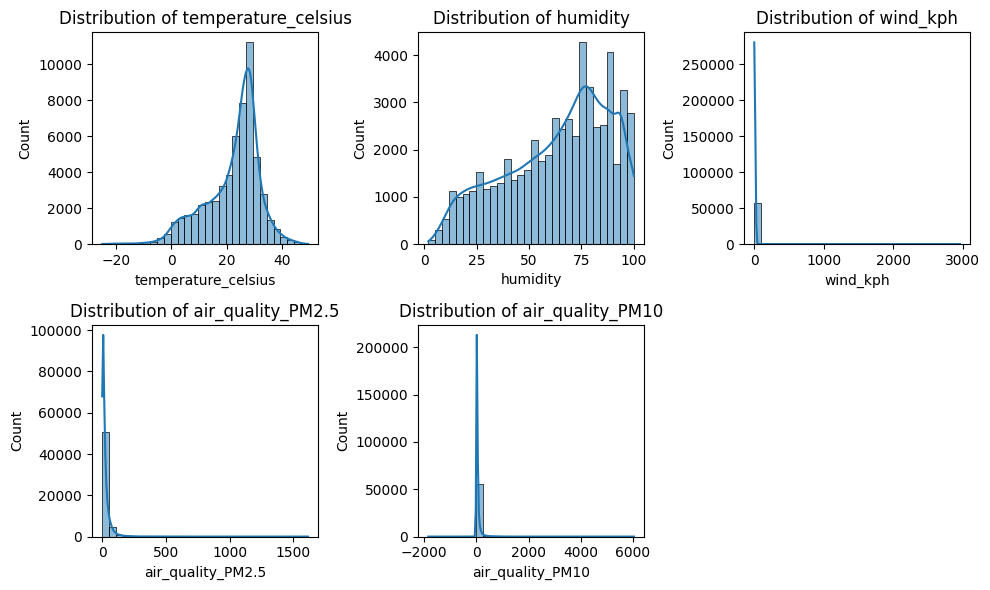

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = ['temperature_celsius', 'humidity', 'wind_kph', 'air_quality_PM2.5', 'air_quality_PM10']

plt.figure(figsize=(10, 6))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.savefig(os.path.join(path, "Histogram.png"), dpi=300)

plt.show()



### **Boxplot** - Identifying Outliers

- Boxplots are used to detect outliers in numerical variables by showing the interquartile range (IQR).
- Values outside 1.5 * IQR are potential outliers.

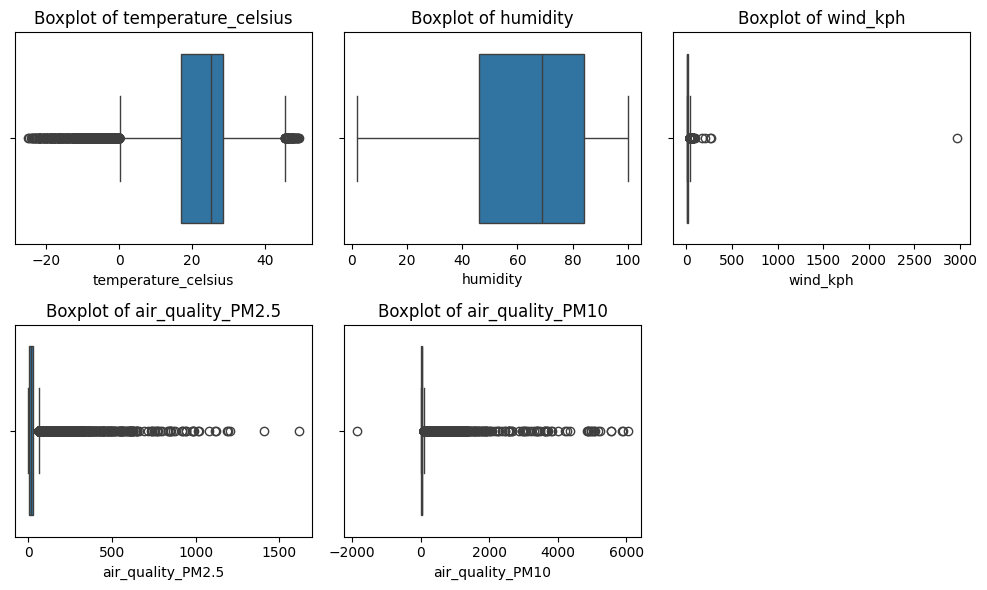

In [48]:
plt.figure(figsize=(10, 6))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.savefig(os.path.join(path,"BoxPlot.png"),dpi=300)
plt.show()


## Time Series Trends

### **Line Plot** - Observing Trends Over Time
- A line plot helps us observe how variables change over time.
- We will focus on temperature, wind speed, and air quality

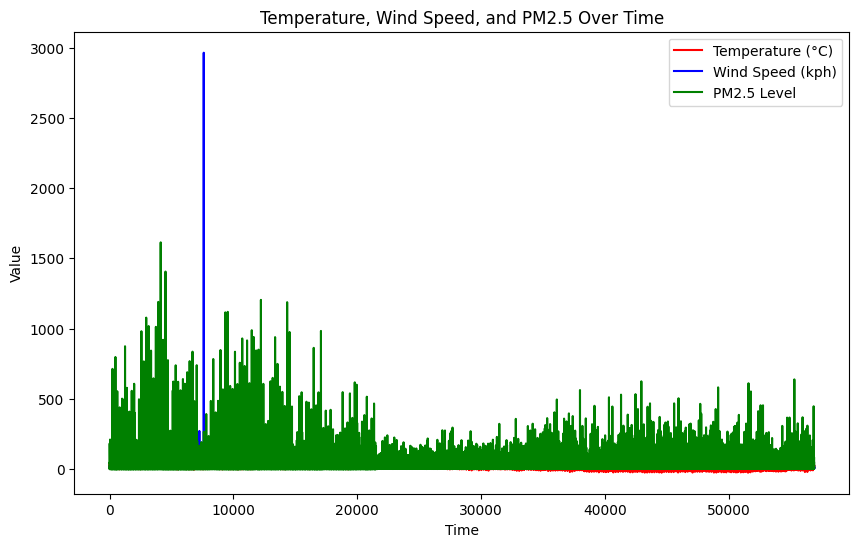

In [50]:
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['temperature_celsius'], label="Temperature (°C)", color='red')
plt.plot(df.index, df['wind_kph'], label="Wind Speed (kph)", color='blue')
plt.plot(df.index, df['air_quality_PM2.5'], label="PM2.5 Level", color='green')

plt.legend()
plt.title("Temperature, Wind Speed, and PM2.5 Over Time")
plt.xlabel("Time")
plt.ylabel("Value")
plt.show()

### **Rolling Averages** - Smoothing Trends
- A rolling average smooths fluctuations and reveals overall trends in the data.



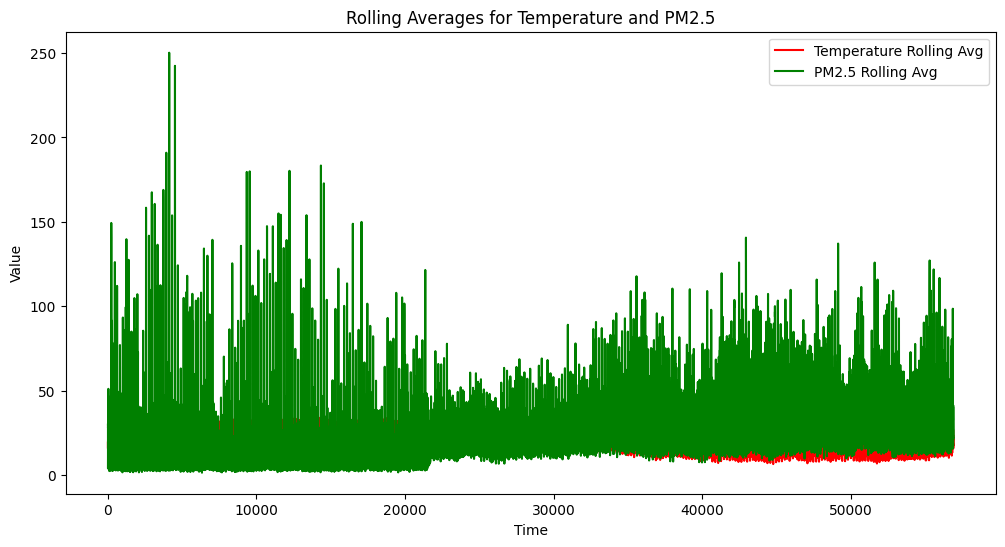

In [52]:
df['temp_rolling'] = df['temperature_celsius'].rolling(window=7).mean()
df['aq_rolling'] = df['air_quality_PM2.5'].rolling(window=7).mean()

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['temp_rolling'], label="Temperature Rolling Avg", color='red')
plt.plot(df.index, df['aq_rolling'], label="PM2.5 Rolling Avg", color='green')

plt.legend()
plt.title("Rolling Averages for Temperature and PM2.5")
plt.xlabel("Time")
plt.ylabel("Value")
plt.show()


### Seasonal Decomposition - Breaking Down Trends
Seasonal decomposition separates time series data into:

- Trend (overall pattern)
- Seasonal (recurring variations)
- Residuals (random noise)

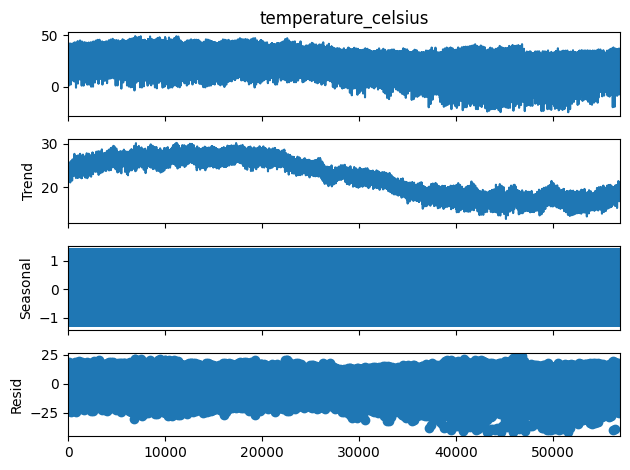

In [56]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomp = seasonal_decompose(df['temperature_celsius'], model='additive', period=30)
decomp.plot()
plt.savefig(os.path.join(path,"SeasonalDecompose.png"))
plt.show()


## Relationships & Correlations

### Scatter Plot - Finding Relationships
A scatter plot shows relationships between two variables.

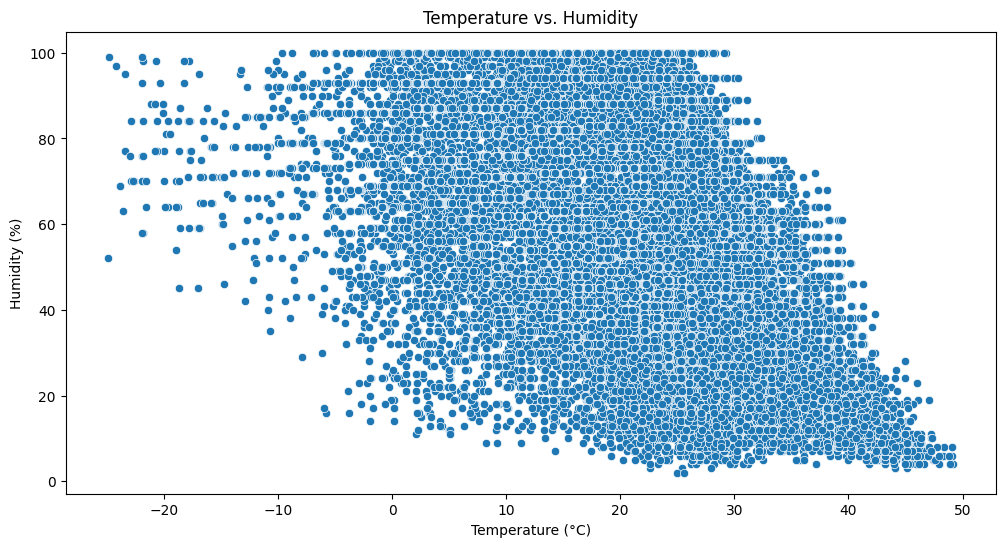

In [57]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df['temperature_celsius'], y=df['humidity'])
plt.title("Temperature vs. Humidity")
plt.xlabel("Temperature (°C)")
plt.ylabel("Humidity (%)")
plt.savefig(os.path.join(path,"ScatterPlot.png"))
plt.show()


### Correlation Heatmap - Finding Strong Relationships
A heatmap shows the correlation between all numerical variables.

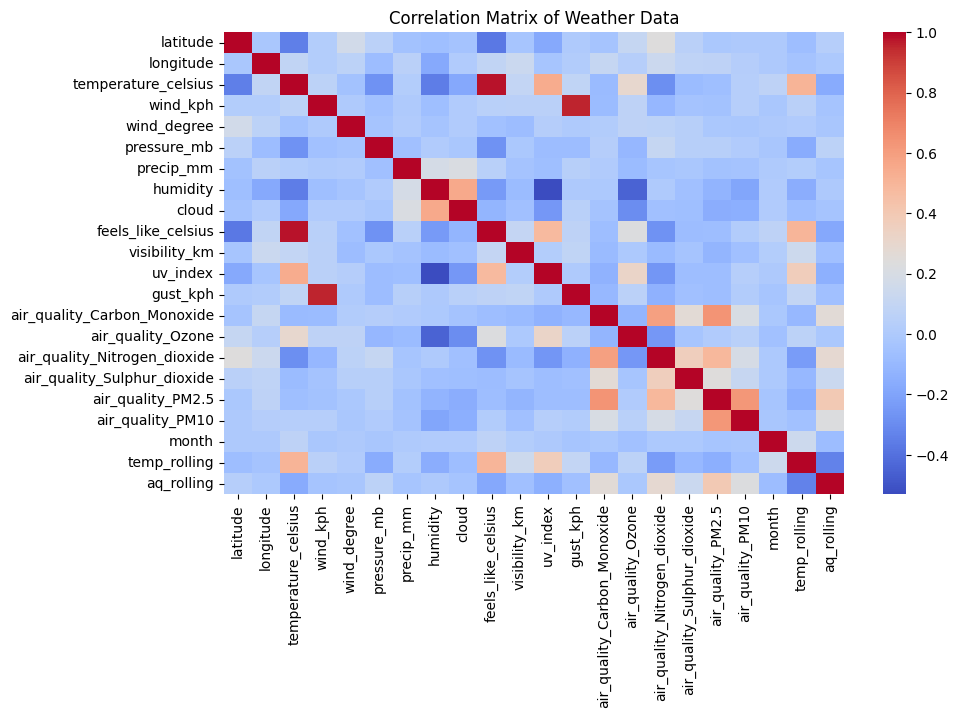

In [62]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.select_dtypes(include=['number']).corr(), cmap="coolwarm")
plt.title("Correlation Matrix of Weather Data")
plt.savefig(os.path.join(path, "HeatMap.png"))
plt.show()


## Extreme Weather Detection

### Violin Plot - Identifying Weather Extremes
A violin plot shows how variable distributions differ across conditions.



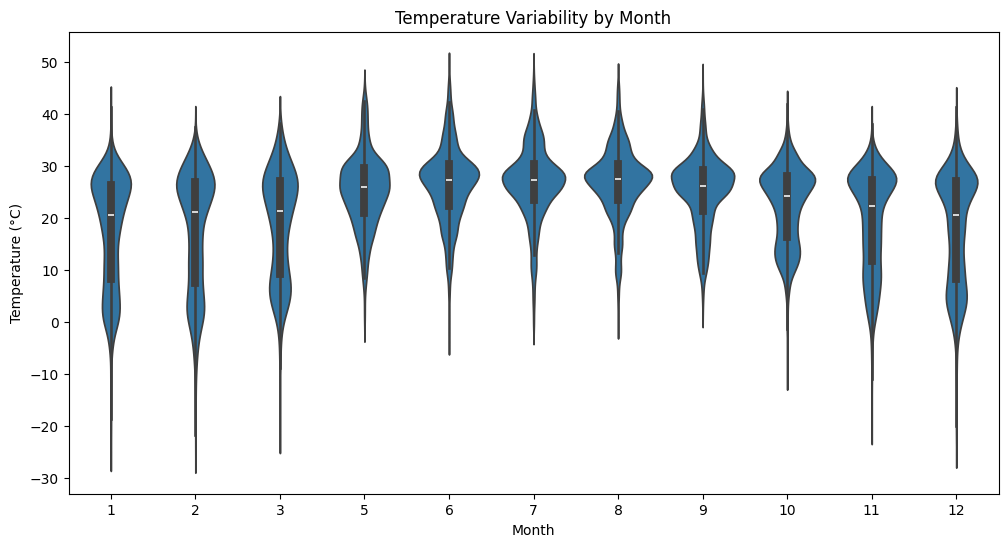

In [68]:
plt.figure(figsize=(12, 6))
sns.violinplot(x="month", y="temperature_celsius", data=df)
plt.title("Temperature Variability by Month")
plt.xlabel("Month")
plt.ylabel("Temperature (°C)")
plt.savefig(os.path.join(path, "ViolinPlot.png"))
plt.show()


### Anomaly Detection - Identifying Unusual Events
We use Z-scores to detect extreme weather events.

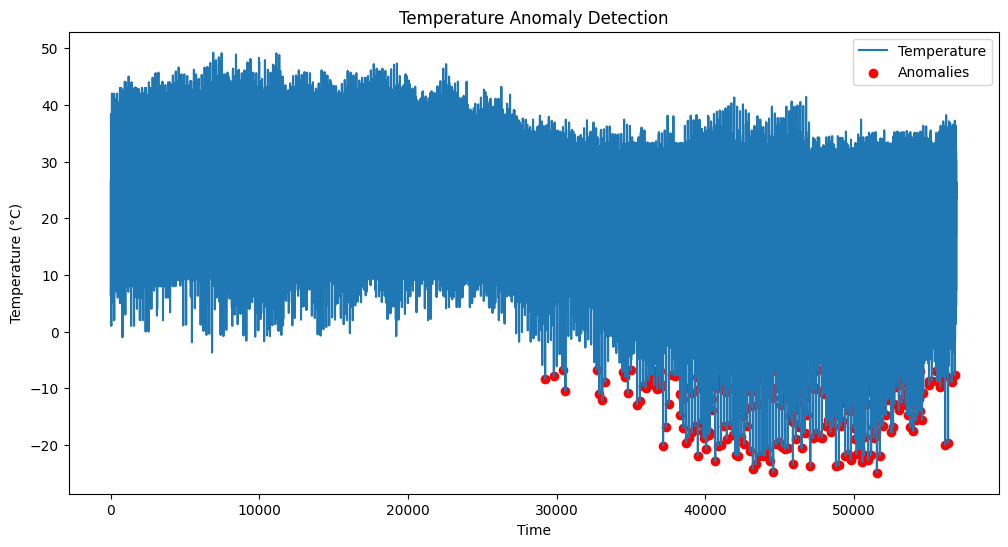

In [71]:
from scipy.stats import zscore

df['temp_zscore'] = zscore(df['temperature_celsius'])
df['anomaly'] = df['temp_zscore'].apply(lambda x: 1 if abs(x) > 3 else 0)

# Highlight anomalies
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['temperature_celsius'], label="Temperature")
plt.scatter(df[df['anomaly'] == 1].index, df[df['anomaly'] == 1]['temperature_celsius'], color='red', label="Anomalies")

plt.legend()
plt.title("Temperature Anomaly Detection")
plt.xlabel("Time")
plt.ylabel("Temperature (°C)")
plt.savefig(os.path.join(path,"Anomalydetection.png"))
plt.show()
